In [35]:
import folium
import requests
import streamlit as st 
from streamlit_folium import st_folium, folium_static
import osmnx as ox
import networkx as nx
import osmapi

In [29]:
# Getting start/dest coordinates
def get_lat_lon(streetname):
    BASE_URL = 'https://nominatim.openstreetmap.org/search?format=json'
    response = requests.get(f'{BASE_URL}&street={streetname}&city=Frankfurt')
    data = response.json()
    
    if data:
        lat = data[0].get('lat')
        lon = data[0].get('lon')
        return float(lat), float(lon)
    else:
        # Handle the case where the geocoding service does not return valid data
        return None

In [43]:
# Get route from OSM
def get_osm_route(start_location, dest_location, route_type='fastest route'):
    # convert string address into geographical coordinates
    start_coords = get_lat_lon(start_location)
    dest_coords = get_lat_lon(dest_location)

    if route_type == 'fastest':
        G = ox.graph_from_place('Frankfurt', network_type='bike')
        G = ox.add_edge_speeds(G)
        G = ox.add_edge_travel_times(G)

        # Get closest graph nodes to origin and destination
        orig_node, destination_node = ox.distance.nearest_nodes(
            G, [start_coords[1], dest_coords[1]], [start_coords[0], dest_coords[0]])

        # find shortest path based on travel time
        route = nx.shortest_path(G, orig_node, destination_node, weight='travel_time')

    elif route_type == 'bike_friendly':
        # Just a straight polyline
        route = [(start_coords[0], start_coords[1]), (dest_coords[0], dest_coords[1])]

    else:
        raise ValueError("Invalid route type. Supported types: 'fastest route', 'bike-friendly route'")

    return route

In [44]:
routes = get_osm_route('Homburger Landstraße 283', '')

In [3]:
G = ox.graph_from_place('Frankfurt', network_type='bike')

In [31]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# convert string address into geographical coordinates
start = get_lat_lon('Homburger Landstraße 283')
dest = get_lat_lon('Poststrasse 5')

In [32]:
# get closes graph nodes to origin and destination
orig_node = ox.distance.nearest_nodes(G, start[1], start[0])
destination_node = ox.distance.nearest_nodes(G, dest[1], dest[0])

In [33]:
# find shortest path based on travel time
route = nx.shortest_path(G, orig_node, destination_node, weight='travel_time')

In [45]:
# Initialize OSM API
api = osmapi.OsmApi()

# Get the latitude and longitude for each node in the route
coordinates = []
for node_id in routes:
    node_info = api.NodeGet(node_id)
    lon = node_info["lon"]
    lat = node_info["lat"]
    coordinates.append((lat, lon))

In [47]:
m = folium.Map(location=start, width=1200, height=720)

folium.Marker(start).add_to(m)
folium.Marker(dest).add_to(m)
folium.PolyLine(coordinates).add_to(m)

m

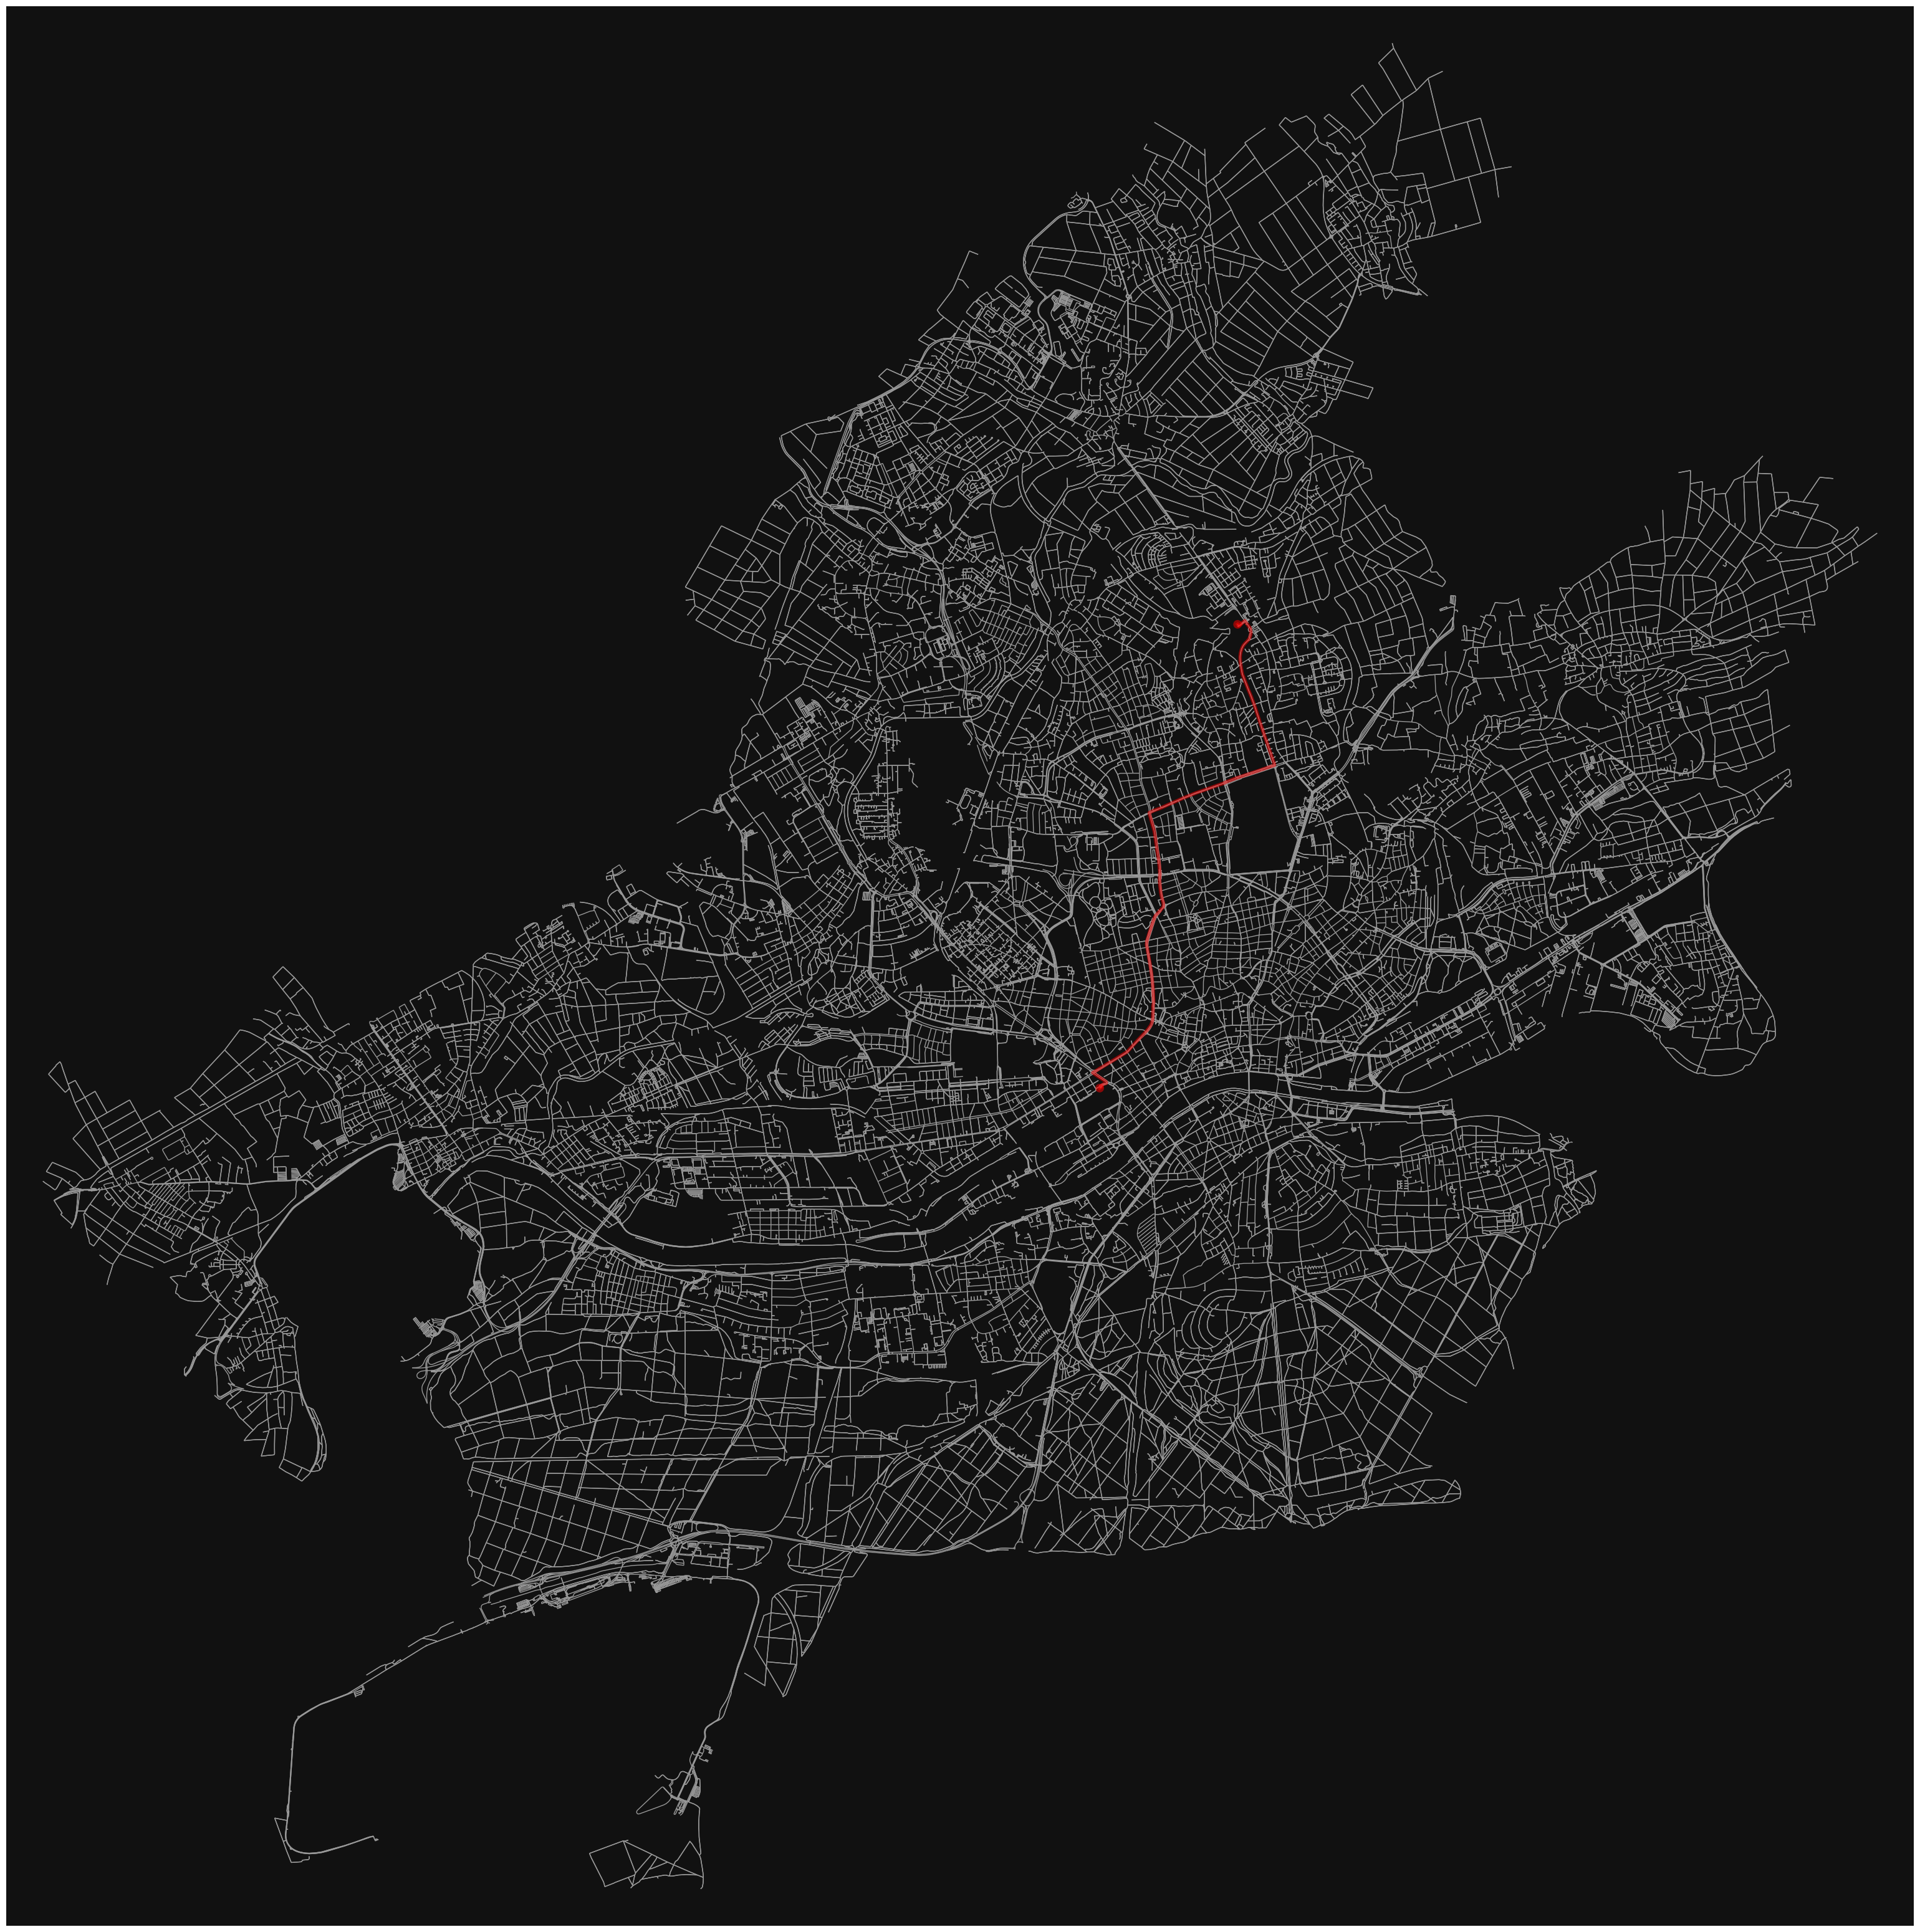

AttributeError: 'tuple' object has no attribute 'add_child'

In [25]:
fig = ox.plot_graph_route(G, route, node_size=0, figsize=(40,40))


In [ ]:
# m = folium.Map(location=location, width=1200, height=720)

# folium.Marker(location).add_to(m)
# folium.Marker(location2).add_to(m)
# folium.PolyLine((location, location2)).add_to(m)

# m